In [40]:
import pandas as pd
import numpy as np

In [41]:
import datetime

In [148]:
df = pd.read_csv('member.csv')

In [149]:
df = df.rename(columns = {'Order_count':'Order_Count','last_order':'Last_Order'})

In [150]:
df['Last_Order'] = pd.to_datetime(df['Last_Order'].astype(str), format='%Y%m%d')

In [151]:
df.head()

,Member_Id,Order_Sales,Order_Count,Last_Order
0,942648,549,1,2020-12-31
1,942651,599,1,2021-01-01
2,942653,2945,1,2021-01-01
3,942655,378,1,2021-01-01
4,942657,447,1,2021-01-03


In [152]:
df = df.drop(index = 0)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7960 entries, 1 to 7960
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Member_Id    7960 non-null   int64         
 1   Order_Sales  7960 non-null   int64         
 2   Order_Count  7960 non-null   int64         
 3   Last_Order   7960 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 310.9 KB


In [154]:
def Last_Level(l):
    if l < pd.Timestamp('2021-05-25'):
        return 0
    else:
        return 1

In [155]:
df['Last_Order_Level'] = df['Last_Order'].apply(Last_Level)

In [156]:
df.head()

,Member_Id,Order_Sales,Order_Count,Last_Order,Last_Order_Level
1,942651,599,1,2021-01-01,0
2,942653,2945,1,2021-01-01,0
3,942655,378,1,2021-01-01,0
4,942657,447,1,2021-01-03,0
5,942659,189,1,2021-01-01,0


In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

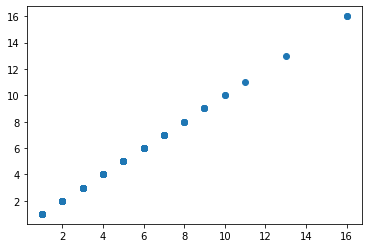

In [158]:
plt.scatter(df['Order_Count'], df['Order_Count']) 

In [164]:
pivot_Order_Count = pd.pivot_table(df,index = 'Order_Count',values = 'Member_Id',aggfunc = 'count')
pivot_Order_Count

,Member_Id
Order_Count,
1,6448
2,1109
3,265
4,73
5,33
6,11
7,7
8,4
9,4


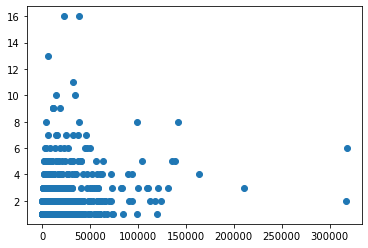

In [165]:
plt.scatter(df['Order_Sales'], df['Order_Count']) 

In [169]:
def Order_Count(o):
    if o >= 7:
        return 0
    elif o > 3 and o <= 6:
        return 1
    elif o == 3:
        return 2
    elif o == 2:
        return 3
    else:
        return 4
    
def Order_Sales(s):
    if s > 150000:
        return 0
    elif s >= 70000 and s < 150000:
        return 1
    elif s >= 50000 and s < 70000:
        return 2
    elif s >= 30000 and s < 50000:
        return 3
    elif s >= 10000 and s < 30000:
        return 4
    elif s >= 5000 and s < 10000:
        return 5
    else:
        return 6

In [170]:
df['Order_Count_Level'] = df['Order_Count'].apply(Order_Count)

In [171]:
df['Order_Sales_Level'] = df['Order_Sales'].apply(Order_Sales)

In [172]:
df

,Member_Id,Order_Sales,Order_Count,Last_Order,Last_Order_Level,Order_Count_Level,Order_Sales_Level
1,942651,599,1,2021-01-01,0,4,6
2,942653,2945,1,2021-01-01,0,4,6
3,942655,378,1,2021-01-01,0,4,6
4,942657,447,1,2021-01-03,0,4,6
5,942659,189,1,2021-01-01,0,4,6
...,...,...,...,...,...,...,...
7956,1024210,1380,1,2021-06-30,1,4,6
7957,1024232,13780,1,2021-06-30,1,4,4
7958,1024240,2700,1,2021-06-30,1,4,6
7959,1024247,2700,1,2021-06-30,1,4,6


In [174]:
df_kmeans = df.drop(['Member_Id','Order_Sales','Order_Count','Last_Order'],axis = 1).copy()

In [175]:
df_kmeans

,Last_Order_Level,Order_Count_Level,Order_Sales_Level
1,0,4,6
2,0,4,6
3,0,4,6
4,0,4,6
5,0,4,6
...,...,...,...
7956,1,4,6
7957,1,4,4
7958,1,4,6
7959,1,4,6


In [177]:
from sklearn.cluster import KMeans
ssd = []
for k in range(1,11):
    model = KMeans(n_clusters = k)
    model.fit(df_kmeans)
    ssd.append(model.inertia_)

/Users/wangxiang/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


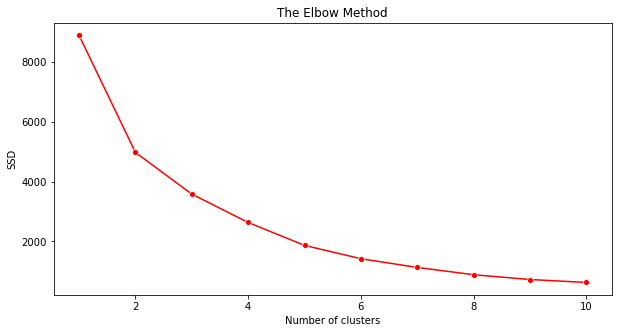

In [178]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), ssd,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

In [179]:
pd.Series(ssd).diff()

0            NaN
1   -3911.150306
2   -1391.540299
3    -947.857764
4    -766.303771
5    -444.262113
6    -291.772148
7    -242.642463
8    -160.380733
9     -97.908717
dtype: float64

In [180]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
clusters = kmeans.fit_predict(df_kmeans)

In [181]:
df['Clusters'] = clusters

In [182]:
df

,Member_Id,Order_Sales,Order_Count,Last_Order,Last_Order_Level,Order_Count_Level,Order_Sales_Level,Clusters
1,942651,599,1,2021-01-01,0,4,6,5
2,942653,2945,1,2021-01-01,0,4,6,5
3,942655,378,1,2021-01-01,0,4,6,5
4,942657,447,1,2021-01-03,0,4,6,5
5,942659,189,1,2021-01-01,0,4,6,5
...,...,...,...,...,...,...,...,...
7956,1024210,1380,1,2021-06-30,1,4,6,1
7957,1024232,13780,1,2021-06-30,1,4,4,0
7958,1024240,2700,1,2021-06-30,1,4,6,1
7959,1024247,2700,1,2021-06-30,1,4,6,1


In [199]:
pivot_kmeans = pd.pivot_table(df,index = ['Clusters','Last_Order_Level'],
                              values = ['Order_Sales','Order_Count'],
                              aggfunc = 'mean')

In [197]:
pivot_kmeans.round(1)

Order_Count  Order_Sales
Clusters Last_Order_Level                          
0        0                         1.2      18472.4
         1                         1.3      23565.2
1        1                         1.0       2050.0
2        0                         2.3       2801.5
         1                         2.2       3899.4
3        0                         5.3      23081.6
         1                         4.3      33518.0
4        0                         1.0       6808.4
         1                         1.0       7167.9
5        0                         1.0       1396.4

In [ ]:
#0 代表 1~6月有消費 消費平均次數大於1 平均訂單金額小於平均
#1 代表 只有在股東會期間有消費 消費平均次數為1 平均訂單金額小於平均
#2 代表 1~6月有消費 消費平均次數大於2 平均訂單金額接近或大於平均
#3 代表 1~6月有消費 消費平均次數大於4 平均訂單金額接近或大於平均 
#4 代表 1~6月有消費 消費平均次數為1 平均訂單金額大於平均
#5 代表 並未在股東會期間有消費 消費平均次數為1 平均訂單金額小於平均